In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Чтение данных

In [80]:
data = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')

In [83]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [84]:
test = pd.read_csv('competitive-data-science-predict-future-sales/test.csv')

In [85]:
items = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')

In [86]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [87]:
items_cat = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')

In [88]:
items_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [89]:
shops = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')

In [90]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## Объединяем данные в один датафрейм

In [93]:
df = data.merge(items, how='left').merge(items_cat, how='left').merge(shops, how='left')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
df['date'] = pd.to_datetime(df['date'])

In [97]:
df['total'] = df['item_price'] * df['item_cnt_day']

In [130]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total,city
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.00,Ярославль
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",899.00,Москва
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",-899.00,Москва
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1709.05,Москва
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1099.00,Москва


Посмотрим зависимость выручки от времени

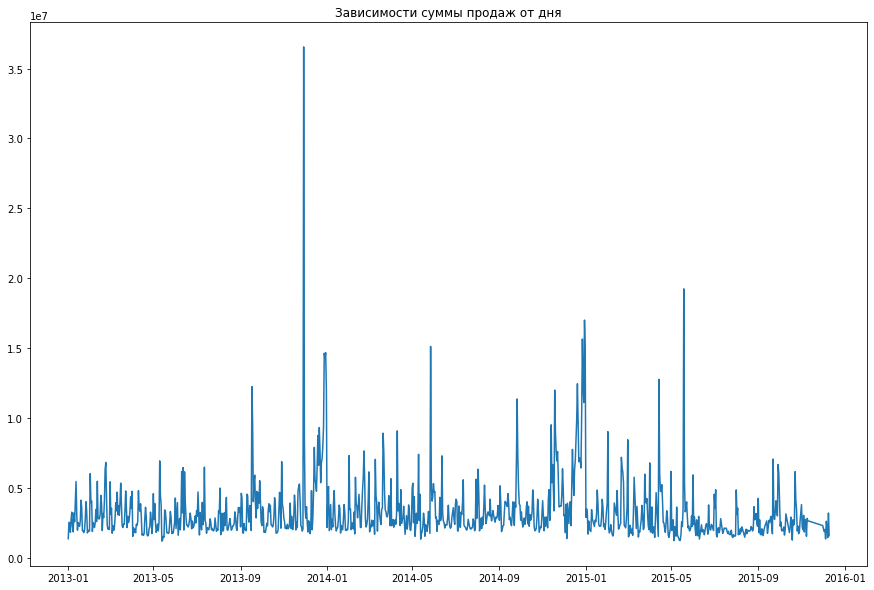

In [137]:
plt_df = df.groupby('date')['total'].sum().reset_index().sort_values('date')
plt.figure(figsize=(15, 10))
plt.plot(plt_df['date'], plt_df['total'])
plt.title('Зависимости суммы продаж от дня')
plt.show()

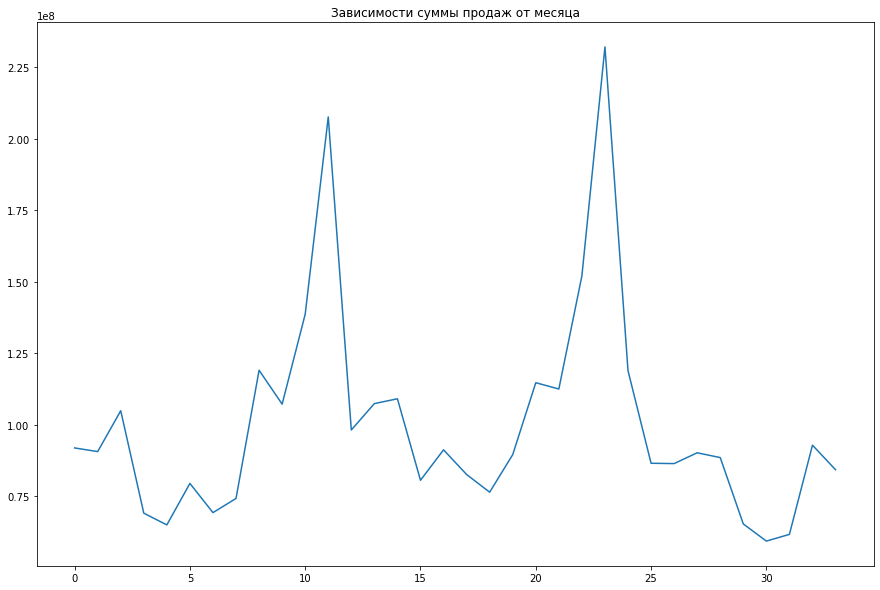

In [138]:
plt_df = df.groupby('date_block_num')['total'].sum().reset_index().sort_values('date_block_num')
plt.figure(figsize=(15, 10))
plt.plot(plt_df['date_block_num'], plt_df['total'])
plt.title('Зависимости суммы продаж от месяца')
plt.show()

Есть выраженная сезонность в продажах как по дням, так и по месяцам, выраженного тренда не видно, так что наибольший вклад в стоимость ожидается от стадии одного "сезона"

Посмотрим на распределения количества проданных товаров и стоимости по разным признакам

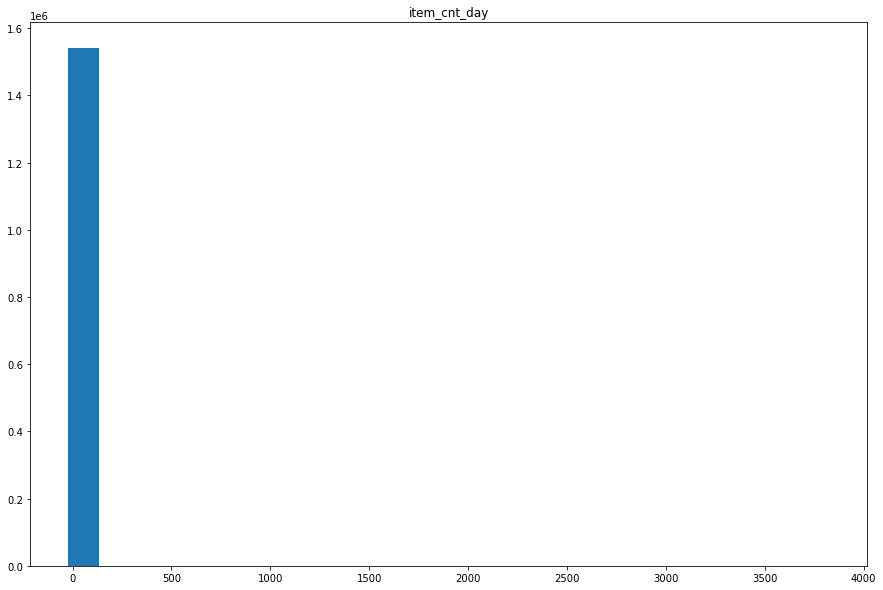

In [149]:
plt_df = df.groupby(['date', 'item_id'])['item_cnt_day'].sum()
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=25)
plt.title('item_cnt_day')
plt.show()

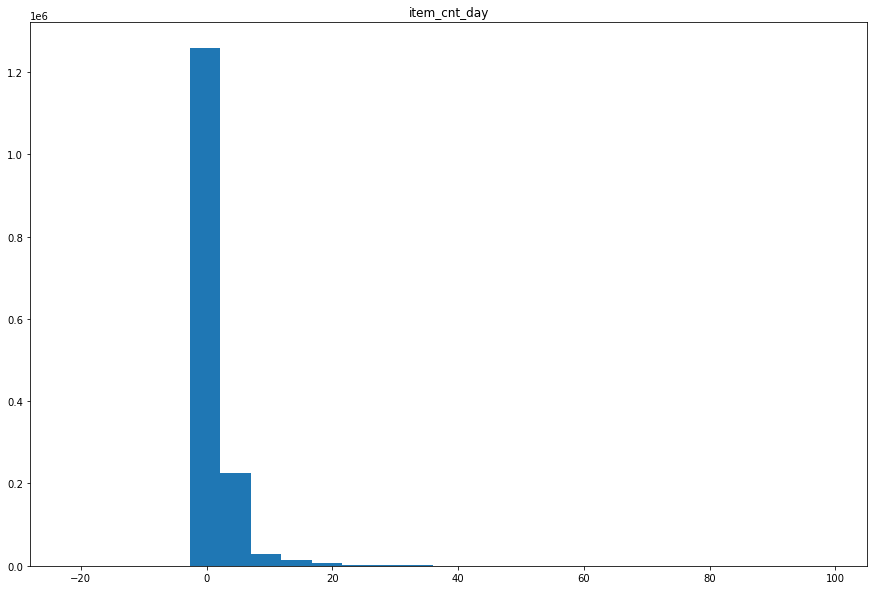

In [179]:
plt_df = df.groupby(['date', 'item_id'])['item_cnt_day'].sum()
plt_df = plt_df[(plt_df < 100)]
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=25)
plt.title('item_cnt_day')
plt.show()

Большинство товаров продается в малом количестве в день, но есть выбросы: товары, которых продается большое количество, есть смысл логарифмировать такую величину, чтобы сгладить разброс

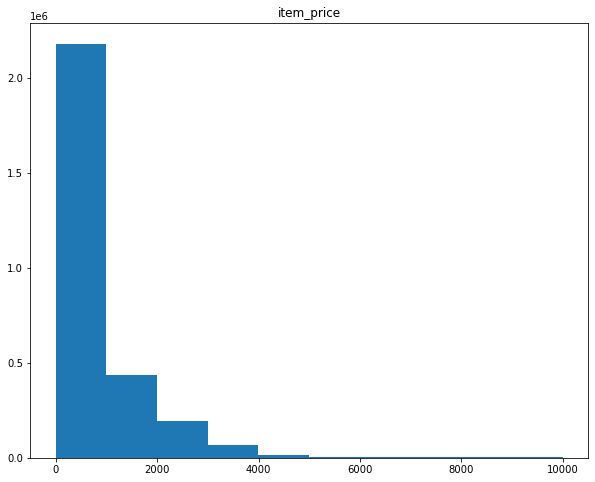

In [174]:
plt_df = df[df['item_price'] <= 10000]
plt.figure(figsize=(10, 8))
plt.hist(plt_df['item_price'])
plt.title('item_price')
plt.show()

Аналогичная ситуация с ценами, большинство товаров стоят меньше 1000, но есть выбросы выше, можно попробовать логарифмировать

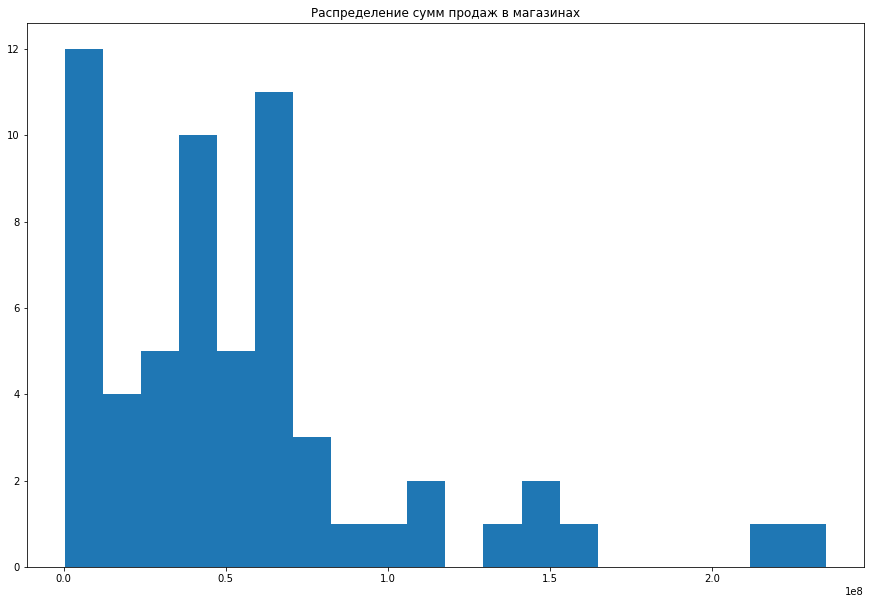

In [175]:
plt_df = df.groupby('shop_id')['total'].sum()
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=20)
plt.title('Распределение сумм продаж в магазинах')
plt.show()

Есть магазины с большой суммой продаж, но в целом разброс не слишком большой

Посмотрим на связь цены товара и количества продаж

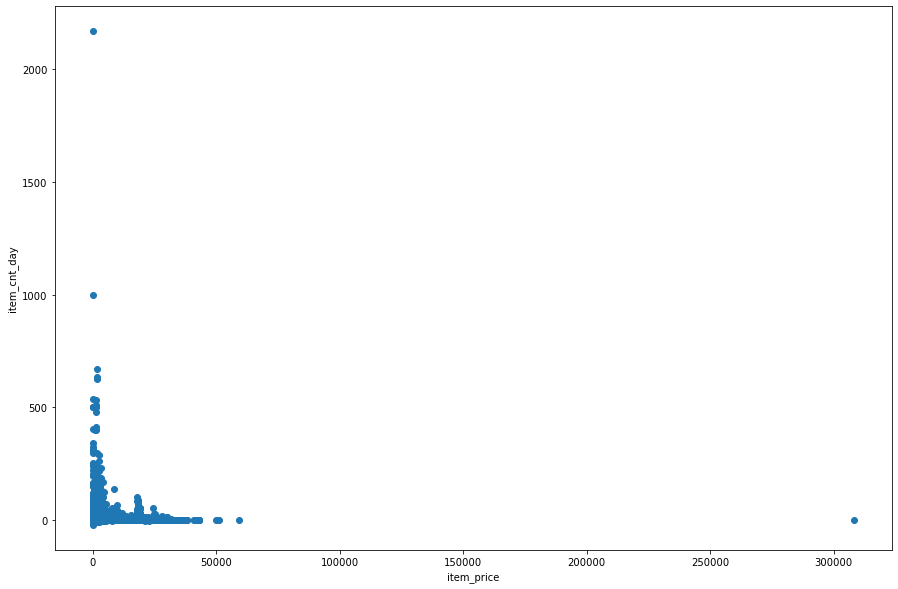

In [154]:
plt_df = df
plt.figure(figsize=(15, 10))
plt.scatter(df['item_price'], df['item_cnt_day'])
plt.xlabel('item_price')
plt.ylabel('item_cnt_day')
plt.show()

Можно выделить 2 группы, расположенные примерно вдоль двух прямых. В одной группе более дешевые товары, которые продаются в большом объеме. Во второй группе более дорогие товары, которые продаются в малом объеме. В будущем для модели есть смысл либо учитывать группу в модели, либо строить разные модели для каждой группы

Попробуем выделить город из названия магазина

In [166]:
df['city'] = df['shop_name'].apply(lambda x: x.split()[0])

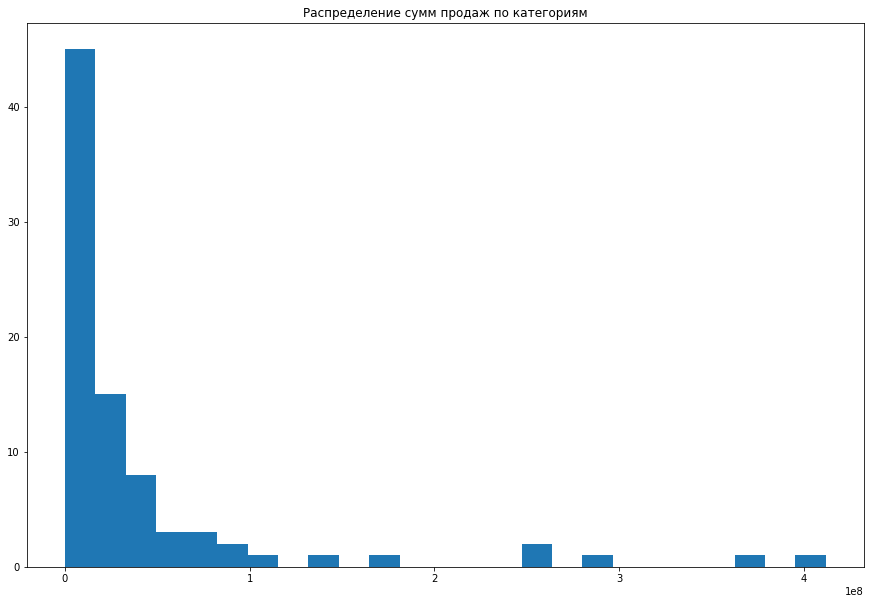

In [176]:
plt_df = df.groupby('item_category_id')['total'].sum()
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=25)
plt.title('Распределение сумм продаж по категориям')
plt.show()

In [169]:
df.loc[plt_df[plt_df > 2e8].index]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total,city
item_category_id,,,,,,,,,,,,
12,2013-07-01,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",399.0,Москва
19,2013-01-27,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",399.0,Москва
20,2013-09-01,0,25,2593,279.0,1.0,DEPECHE MODE Music For The Masses,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",279.0,Москва
23,2013-01-27,0,25,2607,279.0,1.0,DEPECHE MODE The Best Of 1,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",279.0,Москва
30,2013-07-01,0,25,2705,1799.0,1.0,"Dark Souls: Prepare to Die Edition [Xbox 360, ...",23,Игры - XBOX 360,"Москва ТРК ""Атриум""",1799.0,Москва


Наибольшая сумма продаж по категориям "игры" и "музыка"

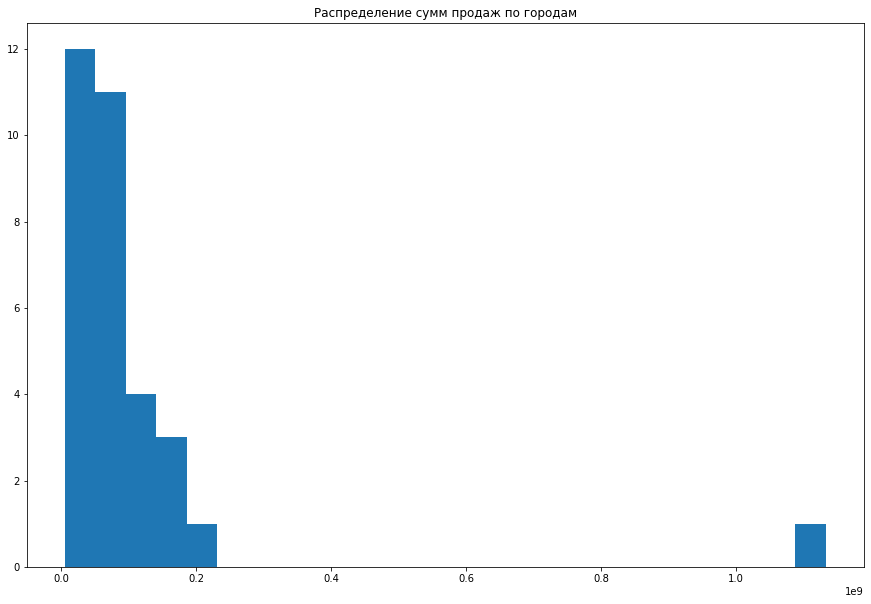

In [177]:
plt_df = df.groupby('city')['total'].sum()
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=25)
plt.title('Распределение сумм продаж по городам')
plt.show()

In [172]:
plt_df[plt_df > 1e9]

city
Москва    1.132706e+09
Name: total, dtype: float64

В Москве сумма продаж сильно выше остальных городов, от этого данные по Москве, возможно, придется использовать отдельно от остальных

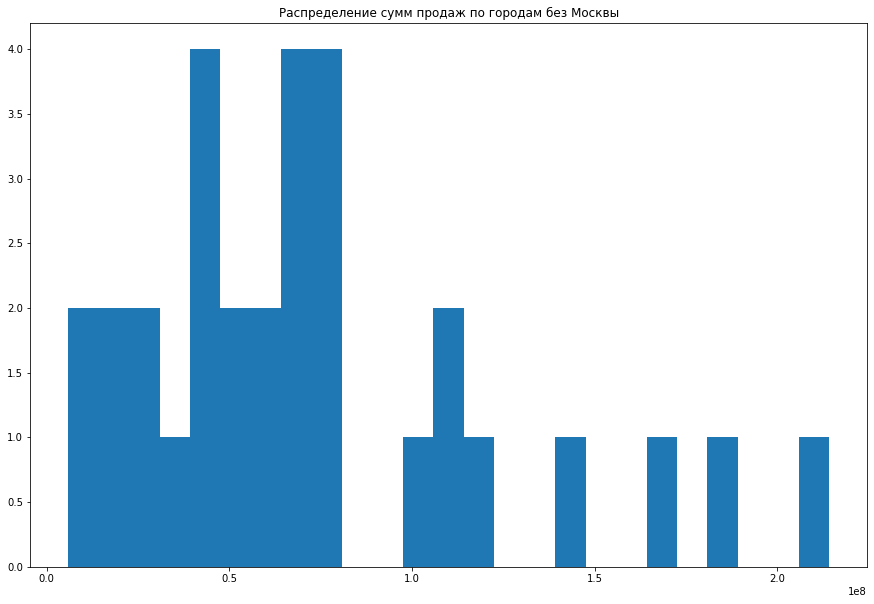

In [178]:
plt_df = df.groupby('city')['total'].sum()
plt_df = plt_df[plt_df < 1e9]
plt.figure(figsize=(15, 10))
plt.hist(plt_df, bins=25)
plt.title('Распределение сумм продаж по городам без Москвы')
plt.show()

Для остальных городов разброс уже не такой большой

Посмотрим на поведение ряда в разных категориях, городах и магазинах

Т.к графиков получилось очень много, то они здесь в итоге не приведены. По городам и магазинам визуально трендов не наблюдается, для некоторых категорий товаров тренд есть (чаще убывающий), для примера приведен график категории Книги - Аудиокниги

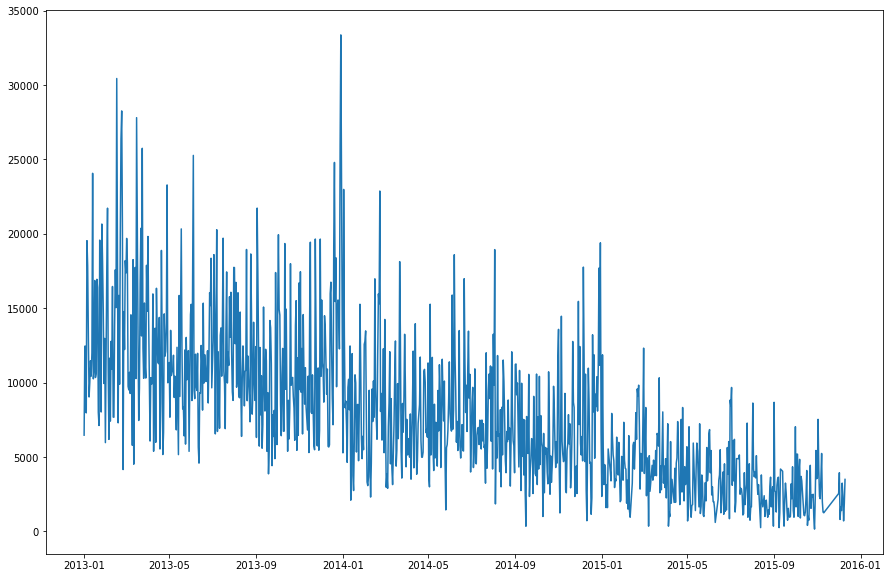

In [191]:
plt_df = df.groupby(['date', 'item_category_name'])['total'].sum().reset_index().sort_values('date')
plt.figure(figsize=(15, 10))
tmp = plt_df[plt_df['item_category_name'] == 'Книги - Аудиокниги']
plt.plot(tmp['date'], tmp['total'])
plt.show()

Исходя из увиденных данных, для модели можно попробовать использовать несколько действий:

- удалить выбросы или выделить их в отдельную группу, например, Москву есть смысл рассматривать отдельно от остальных городов. Также можно бинаризовать признаки, чтобы избежать удаления данных, но при этом уменьшить влияние выбросов
- для цены и количества товаров есть смысл использовать логарифмирование, чтобы "сгладить" изменения
- 2 группы по соотношению цена/количество товара также есть смысл анализировать отдельно (либо отдельный признак, связанный с группой, либо отдельные модели)
- у ряда есть выраженная сезонность и по дням, и по месяцам, выраженного тренда в общих продажах не наблюдается (но он есть, например, для некоторых категорий товаров). Поэтому важно учитывать признаки и то, на какой стадии "сезона" находится ряд в данный момент, чтобы делать предсказание